In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from IPython.display import display, Markdown
from pathlib import Path


data_dir = Path('learning-equality-curriculum-recommendations')

In [2]:
# load the data into pandas dataframes
topics_df = pd.read_csv(data_dir / "topics.csv", index_col=0).fillna({"title": "", "description": ""})
content_df = pd.read_csv(data_dir / "content.csv", index_col=0).fillna("")
correlations_df = pd.read_csv(data_dir / "correlations.csv", index_col=0)

In [5]:
# show a random sample of the topics from the topics dataframe
topics_df.sample(frac=1).head(10)

,title,description,channel,category,level,language,parent,has_content
id,,,,,,,,
t_426c331e3929,Lección 30,,6e90a7,aligned,6,es,t_d5c4b01b6a69,True
t_d642a701c9f9,Lección 16,Resultados de los estudiantes Los estudiantes ...,410920,source,4,es,t_5e1a544119d2,True
t_c341583d5d19,Factoring Polynomials with Quadratic Forms,,d30518,supplemental,3,en,t_58db95a027b9,False
t_db54a84436ab,पद्धत(पैटर्न) चा शोध [02-PS-15],“शुद्धलेखन स्पर्धा - स्पेलिंग बी” चं ज्ञान (इय...,c3dc85,source,2,mr,t_e3da465f60a4,True
t_34e246247244,9.5.1 Directions,,05be9f,aligned,3,en,t_6781eb0bc165,False
t_8203589e2d84,Metals and Non-metals,,ef2088,supplemental,4,en,t_4f165577d035,False
t_29426c70b179,NM_U12 - Le processus d'ecriture,,c36745,supplemental,2,fr,t_66d2fa728fc6,True
t_5aa125aee8a9,How and why political parties change and adapt,,0ec697,source,4,en,t_5775592f101d,True
t_ea5c7aac4ff3,Lección 3,,6e90a7,aligned,6,es,t_3223a937c5cb,True


In [6]:
# show a random sample of the content from the content dataframe
content_df.sample(frac=1).head(10)

,title,description,kind,text,language,copyright_holder,license
id,,,,,,,
c_4a1c735fcf8e,7.4: Green's Function for \(\Delta\),,html5,Theorem 7.1 says that each harmonic function s...,en,CSU and Merlot,CC BY-NC-SA
c_782d6ae6386c,"Convierte a unidades más pequeñas (pulgadas, p...",Practica la conversión de unidades de longitud...,exercise,,es,,
c_818e9806f78f,Level 3 : Properties of trapezium,,exercise,,en,,
c_3c6fb2747d2c,Integumentary System Structure and Function - ...,,video,,en,,
c_5702076f1271,What is the East African Legislative Assembly?...,,video,,en,,
c_096fd000c9b1,Fractions égales et unités différentes,Utiliser la même unité pour déterminer des fra...,exercise,,fr,,
c_a1a53be09416,Teste básico sobre sistema muscular,Teste básico sobre músculos,exercise,,pt,,
c_8b2b33bd97d3,Nos identificamos y así celebramos,,document,,es,,
c_edd5e01a787a,Parametric-Inverses Practice,,exercise,,en,,


In [7]:
# top languages by number of topics
topics_df.language.value_counts().sort_values(ascending=False).head(10)

en    36161
es    13910
pt     4177
ar     3701
fr     3701
bg     2867
sw     2860
gu     2320
bn     2176
hi     1786
Name: language, dtype: int64

In [8]:
# top languages by number of content items
content_df.language.value_counts().sort_values(ascending=False).head(10)

en    65939
es    30844
fr    10682
pt    10435
ar     7418
bg     6050
hi     4042
zh     3849
gu     3677
bn     2513
Name: language, dtype: int64

In [7]:
# numbers of different types of content
content_df.kind.value_counts().sort_values(ascending=False).head(10)

video       61487
document    33873
html5       32563
exercise    25925
audio         199
Name: kind, dtype: int64

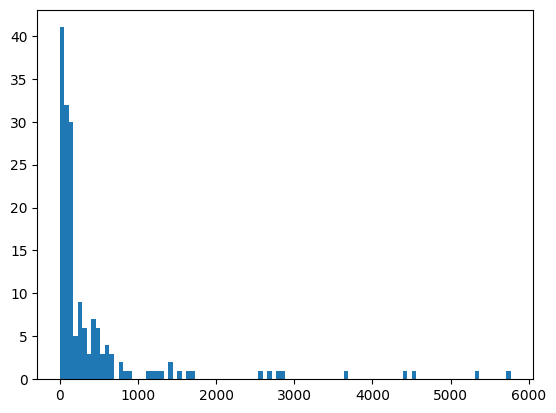

In [9]:
# sizes of different channels (in terms of numbers of topics)
plt.hist(topics_df.channel.value_counts(), bins=100)
plt.show()

In [10]:
# define some helper functions and classes to aid with data traversal

def print_markdown(md):
    display(Markdown(md))

class Topic:
    def __init__(self, topic_id):
        self.id = topic_id

    @property
    def parent(self):
        parent_id = topics_df.loc[self.id].parent
        if pd.isna(parent_id):
            return None
        else:
            return Topic(parent_id)

    @property
    def ancestors(self):
        ancestors = []
        parent = self.parent
        while parent is not None:
            ancestors.append(parent)
            parent = parent.parent
        return ancestors

    @property
    def siblings(self):
        if not self.parent:
            return []
        else:
            return [topic for topic in self.parent.children if topic != self]

    @property
    def content(self):
        if self.id in correlations_df.index:
            return [ContentItem(content_id) for content_id in correlations_df.loc[self.id].content_ids.split()]
        else:
            return tuple([]) if self.has_content else []

    def get_breadcrumbs(self, separator=" >> ", include_self=True, include_root=True):
        ancestors = self.ancestors
        if include_self:
            ancestors = [self] + ancestors
        if not include_root:
            ancestors = ancestors[:-1]
        return separator.join(reversed([a.title for a in ancestors]))

    @property
    def children(self):
        return [Topic(child_id) for child_id in topics_df[topics_df.parent == self.id].index]

    def subtree_markdown(self, depth=0):
        markdown = "  " * depth + "- " + self.title + "\n"
        for child in self.children:
            markdown += child.subtree_markdown(depth=depth + 1)
        for content in self.content:
            markdown += ("  " * (depth + 1) + "- " + "[" + content.kind.title() + "] " + content.title) + "\n"
        return markdown

    def __eq__(self, other):
        if not isinstance(other, Topic):
            return False
        return self.id == other.id

    def __getattr__(self, name):
        return topics_df.loc[self.id][name]

    def __str__(self):
        return self.title
    
    def __repr__(self):
        return f"<Topic(id={self.id}, title=\"{self.title}\")>"


class ContentItem:
    def __init__(self, content_id):
        self.id = content_id

    @property
    def topics(self):
        return [Topic(topic_id) for topic_id in topics_df.loc[correlations_df[correlations_df.content_ids.str.contains(self.id)].index].index]

    def __getattr__(self, name):
        return content_df.loc[self.id][name]

    def __str__(self):
        return self.title
    
    def __repr__(self):
        return f"<ContentItem(id={self.id}, title=\"{self.title}\")>"

    def __eq__(self, other):
        if not isinstance(other, ContentItem):
            return False
        return self.id == other.id

    def get_all_breadcrumbs(self, separator=" >> ", include_root=True):
        breadcrumbs = []
        for topic in self.topics:
            new_breadcrumb = topic.get_breadcrumbs(separator=separator, include_root=include_root)
            if new_breadcrumb:
                new_breadcrumb = new_breadcrumb + separator + self.title
            else:
                new_breadcrumb = self.title
            breadcrumbs.append(new_breadcrumb)
        return breadcrumbs

In [11]:
t = Topic(topics_df.index[33])
print_markdown("\n#### Title:")
print(t.title)
print()
print_markdown("#### Description:")
print(t.description)
print()
print_markdown("#### Breadcrumbs:")
print(t.get_breadcrumbs())
print()
print_markdown("#### Parent:")
print(t.parent)
print()
print_markdown("#### Siblings:")
print(t.siblings)
print()
print_markdown("#### Children:")
print(t.children)
print()
print_markdown("#### Content:")
print(t.content)
print()
if t.content:
    print_markdown("#### All breadcrumbs for first content item:")
    print_markdown("- " + "\n- ".join(t.content[0].get_all_breadcrumbs()))


#### Title:

Lección 2



#### Description:

#### Breadcrumbs:

CREE >> Para el Estudiante >> I Ciclo >> 02 Segundo >> Español Actvidades 2do >> Unidad 1 >> Lección 2



#### Parent:

Unidad 1



#### Siblings:

[<Topic(id=t_845ee242d2b4, title="Lección 3")>, <Topic(id=t_85037a830baf, title="Lección 5")>, <Topic(id=t_95dd68c2ce5b, title="Lección 1")>, <Topic(id=t_a4e7c3871a3a, title="Lección 8")>, <Topic(id=t_e97f66f484ce, title="Lección 4")>, <Topic(id=t_ef45840f03ca, title="Lección 7")>, <Topic(id=t_fac6db0b5079, title="Lección 6")>]



#### Children:

[]



#### Content:

[<ContentItem(id=c_e7e44cb2c32d, title="Siguiendo instrucciones")>]



#### All breadcrumbs for first content item:

- CREE >> Para el Estudiante >> I Ciclo >> 02 Segundo >> Español Actvidades 2do >> Unidad 1 >> Lección 2 >> Siguiendo instrucciones
- CREE >> Para el Docente >> I Ciclo >> 02 Segundo >> Español GD 2do >> Unidad 1 >> Lección 2 >> Siguiendo instrucciones

In [12]:
# display a topic's subtree and associated content titles as a nested markdown list
t = Topic("t_36fd07ff5d96")
# (we truncate the output to 35 lines here to avoid overwhelming the notebook)
print_markdown("\n".join(t.subtree_markdown().split("\n")[:35]))

- Mortgages
  - [Video] Modéliser avec la somme des termes d'une suite géométrique - exemple 2


count    61517.000000
mean         4.550271
std          6.700255
min          1.000000
25%          2.000000
50%          3.000000
75%          5.000000
max        293.000000
dtype: float64

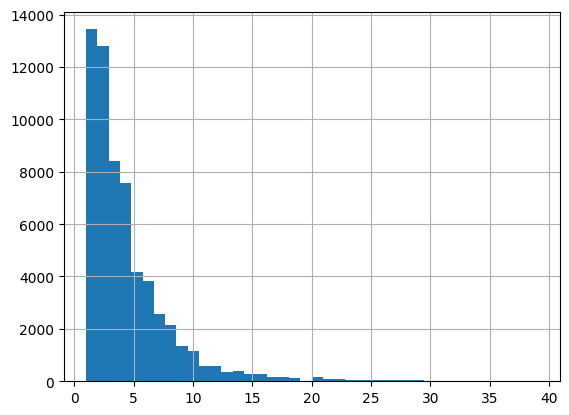

In [13]:
# how many content items are correlated with each topic?
content_per_topic = pd.Series([len(cids.split()) for cids in correlations_df.content_ids])
content_per_topic[content_per_topic < 40].hist(bins=40)
content_per_topic.describe()